# Symplectic Euler - Polar Vortex

### Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [7]:
N = 1000
delta = 0.1

####################### initializtion ########################
x = np.zeros((N,3),float)
y = np.zeros((N,3),float)
dx =np.zeros((3,3),float)
dy = np.zeros((3,3),float)

###################### Store answers ########################
x1 = np.zeros(N,float)
y1 = np.zeros(N,float)
x2 = np.zeros(N,float)
y2 = np.zeros(N,float)
x3 = np.zeros(N,float)
y3 = np.zeros(N,float)


r = np.zeros((3,3),float)
ux = np.zeros((3),float)
uy = np.zeros((3),float)
######################## Constants #########################
H = np.zeros((N-1),float)
px = np.zeros((N-1),float)
py = np.zeros((N-1),float)
lz = np.zeros((N-1),float)

### Initial values 

In [8]:
x[0,0] = -1
y[0,0] = 0
x[0,1] = 1
y[0,1] = 0
x[0,2] = 0
y[0,2] = 1

### Main algorithms

In [9]:
for t in range(1,N):
    for k in range(3):
         ux[k] = uy[k] = 0
    for i in range(3):
        lz[t-1] = lz[t-1] - 0.5 * (x[t-1,i] * x[t-1,i] + y[t-1,i] * y[t-1,i])
        px[t-1] = px[t-1] + y[t-1,i]
        py[t-1] = py[t-1] + x[t-1,i]
        for j in range(3):
            if(i != j):
                dx[i,j] = x[t-1,i]-x[t-1,j]
                dy[i,j] = y[t-1,i]-y[t-1,j]
                r[i,j] = np.sqrt(dx[i,j]**2 + dy[i,j]**2)
                H[t-1] = H[t-1] - (1/mt.pi)*np.log(r[i,j])               
    for i in range(3):
        for j in range(3):
            if(i != j):
                dx[i,j] = x[t-1,i]-x[t-1,j]
                dy[i,j] = y[t-1,i]-y[t-1,j]
                r[i,j] = np.sqrt(dx[i,j]**2 + dy[i,j]**2)
                ux[i] = ux[i] - (1/4*mt.pi)*dy[i,j]/(r[i,j]**2)
    for l in range(3):
            x[t,l] = x[t-1,l] + delta*ux[l]           
    for i in range(3):
        for j in range(3):
            if(i != j):
                dx[i,j] = x[t,i]-x[t,j]
                dy[i,j] = y[t-1,i]-y[t-1,j]
                r[i,j] = np.sqrt(dx[i,j]**2 + dy[i,j]**2)
                uy[i] = uy[i] + (1/4*mt.pi)*dx[i,j]/(r[i,j]**2)
    for l in range(3):
            y[t,l] = y[t-1,l] + delta*uy[l]

### Answers to arrays

In [10]:
x1 = x[:,0]
x2 = x[:,1]
x3 = x[:,2]

y1 = y[:,0]
y2 = y[:,1]
y3 = y[:,2]



### plot answers

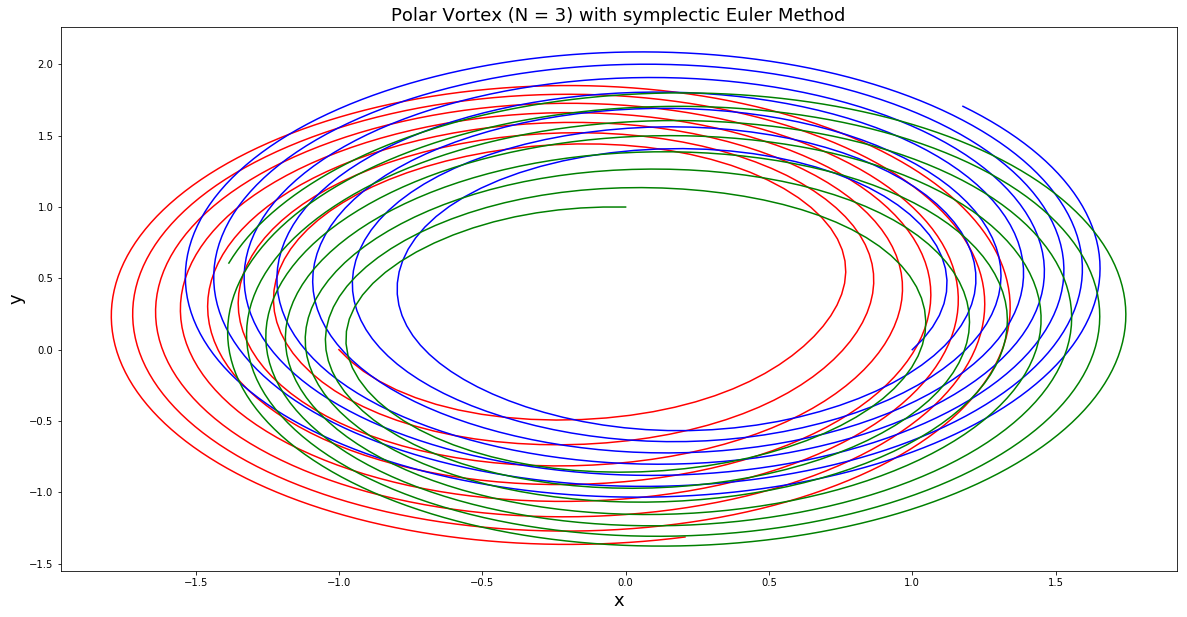

In [18]:
plt.figure(figsize = (20,10))
plt.plot(x1,y1,color = 'red')
plt.plot(x2,y2,color = 'blue')
plt.plot(x3,y3,color = 'green')
plt.title("Polar Vortex (N = 3) with symplectic Euler Method", fontsize = 18)
plt.xlabel('x',fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.savefig('polar votex-sym_Euler.png')

### Define time and constants

In [20]:
time = np.arange(N-1)

In [24]:
datafile_path = "./H-Sym_Euler.txt"
with open(datafile_path, 'w+') as datafile_id:
    np.savetxt(datafile_id, H)
    
datafile_path = "./L-Sym_Euler.txt"
with open(datafile_path, 'w+') as datafile_id:
    np.savetxt(datafile_id, lz)
    
datafile_path = "./Px-Sym_Euler.txt"
with open(datafile_path, 'w+') as datafile_id:
    np.savetxt(datafile_id, px)
    
datafile_path = "./Py-Sym_Euler.txt"
with open(datafile_path, 'w+') as datafile_id:
    np.savetxt(datafile_id, py)

### Plot Energies

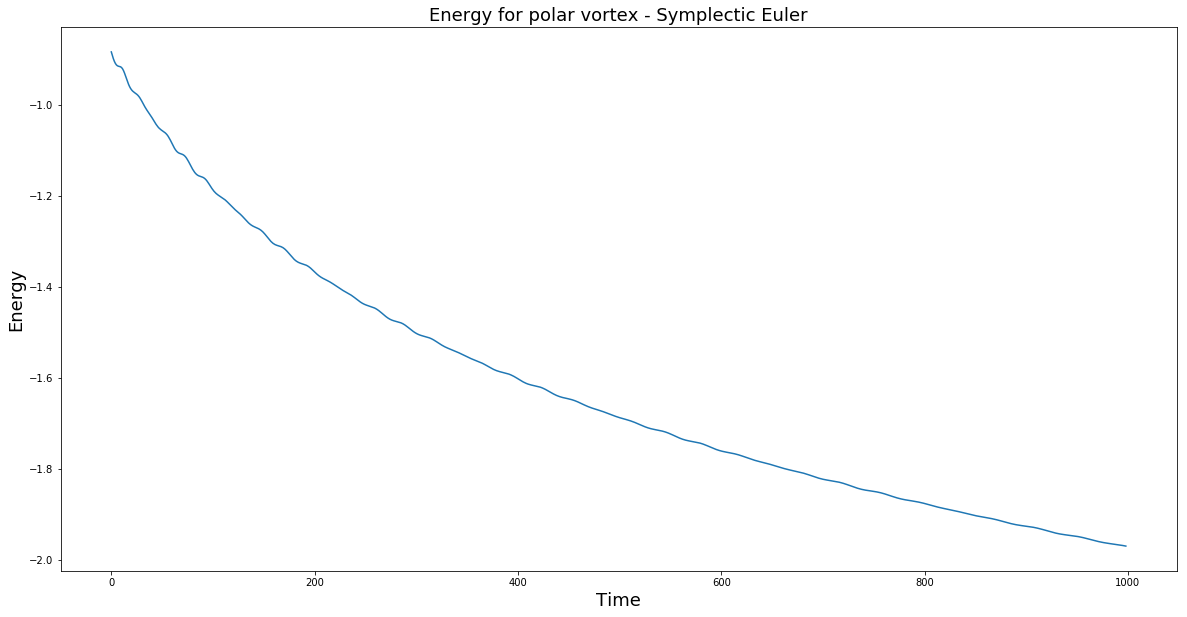

In [29]:
plt.figure(figsize = (20,10))
plt.plot(time,H)
plt.xlabel("Time", fontsize = 18)
plt.ylabel("Energy", fontsize = 18)
plt.title("Energy for polar vortex - Symplectic Euler", fontsize = 18)
plt.savefig("H-Sym-Euler.png")

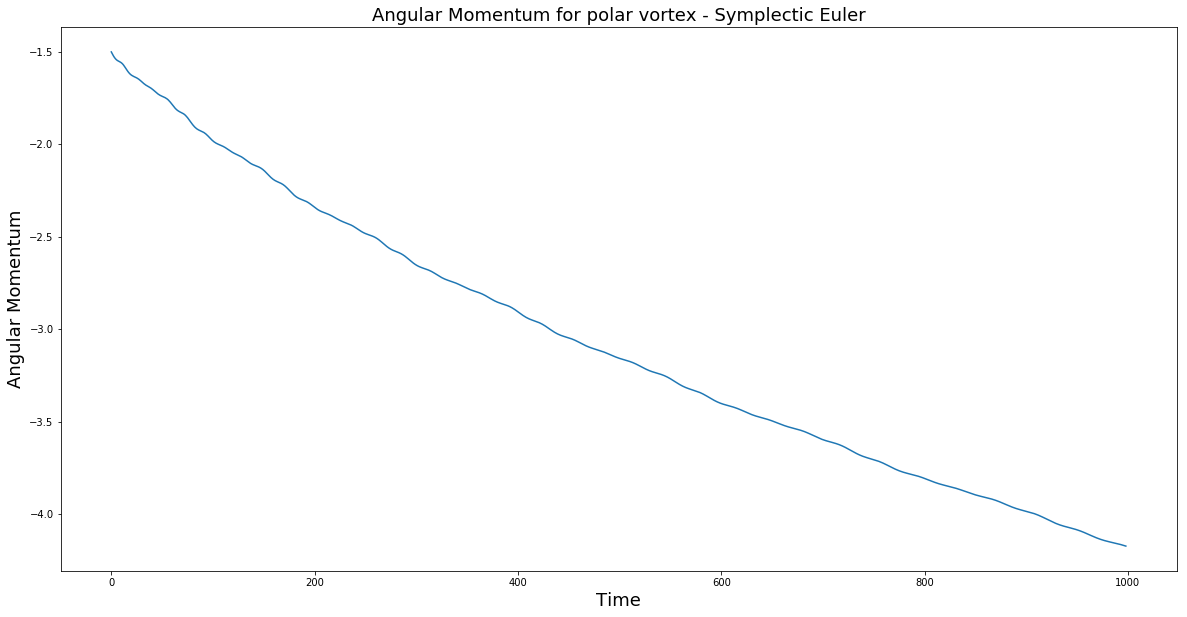

In [31]:
plt.figure(figsize = (20,10))
plt.plot(time,lz)
plt.xlabel("Time", fontsize = 18)
plt.ylabel("Angular Momentum", fontsize = 18)
plt.title("Angular Momentum for polar vortex - Symplectic Euler", fontsize = 18)
plt.savefig("L-Sym-Euler.png")